## TASK 3 - IRIS FLOWER CLASSIFICATION

### The goal of this task is to develop a machine learning model that accurately classify Iris flowers into their respective species.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preparation

### Load dataset

In [3]:
# Create a dataframe
iris = pd.read_csv("IRIS.csv")

In [4]:
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
iris.tail(10)

,sepal_length,sepal_width,petal_length,petal_width,species
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
iris.shape

(150, 5)

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Data Cleaning

In [7]:
# Checking null values
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
# Checking duplicate values
iris.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [9]:
iris.duplicated().sum()

3

In [10]:
# Remove duplicate values
iris= iris.drop_duplicates()

In [11]:
iris.shape

(147, 5)

In [12]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


<Axes: >

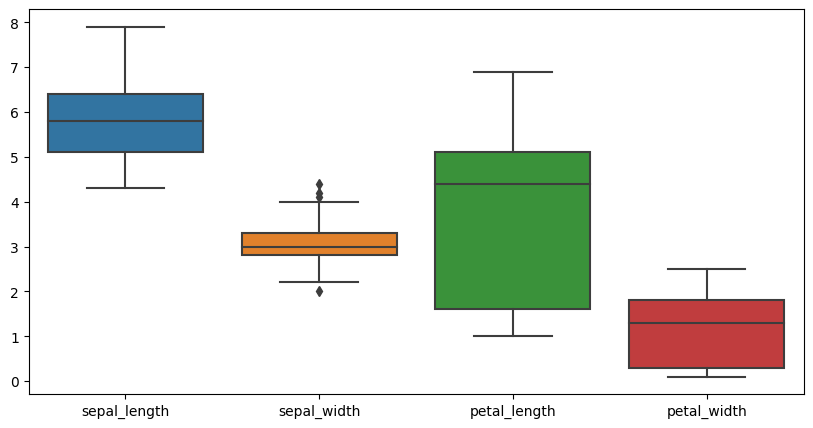

In [13]:
#Outliers detection
fig,ax = plt.subplots(figsize=(10,5))
sns.boxplot(iris,ax=ax)

#### * No considerable outliers in the data

## Exploratory Data Analysis (EDA)

### Descriptive Data Analysis

In [14]:
#Summary of the data
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [15]:
iris.species.unique()


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [16]:
iris['species'].value_counts()

species
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: count, dtype: int64

<Axes: xlabel='species', ylabel='count'>

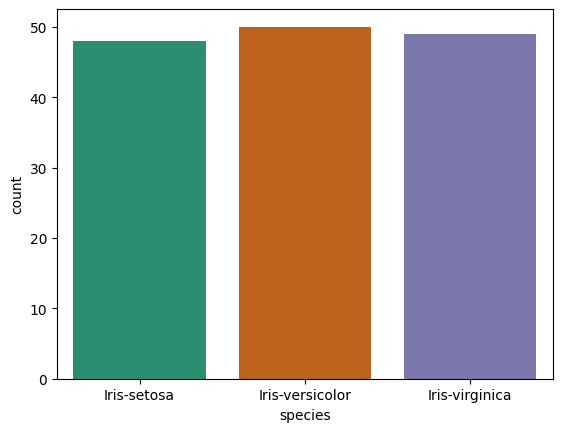

In [17]:
# Plotting the species data
sns.countplot(x = "species",data=iris,palette="Dark2")

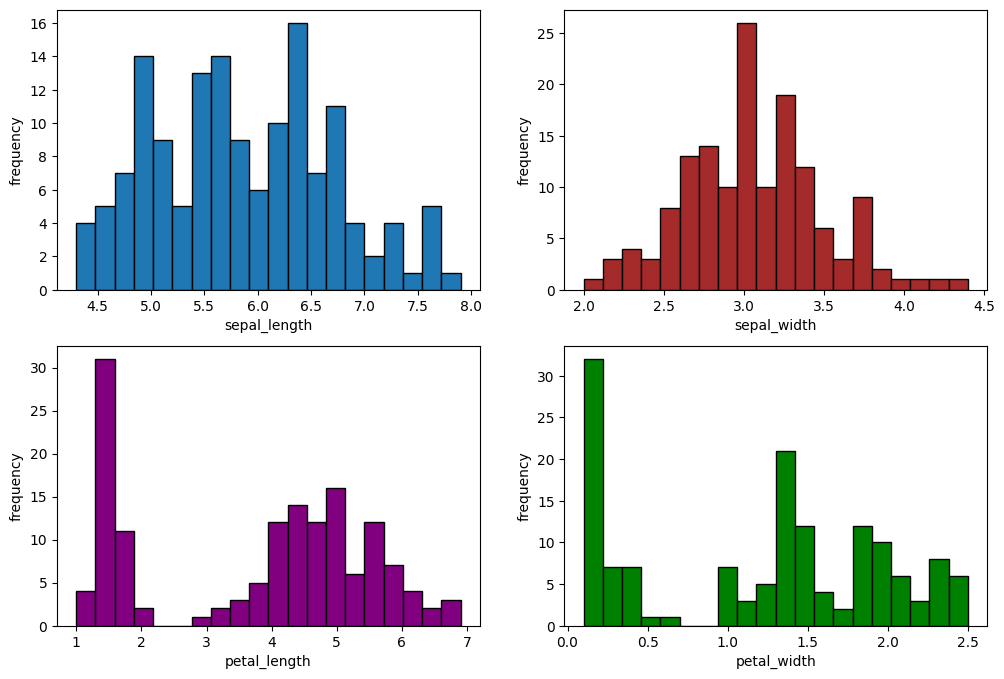

In [18]:
# Histogram plots for numerical features
fig,ax=plt.subplots(2,2, figsize=(12,8))

ax[0,0].hist(iris['sepal_length'],bins=20,edgecolor='black')
ax[0,0].set_xlabel('sepal_length')
ax[0,0].set_ylabel('frequency')

ax[0,1].hist(iris['sepal_width'],bins=20,edgecolor='black',color='brown')
ax[0,1].set_xlabel('sepal_width')
ax[0,1].set_ylabel('frequency')

ax[1,0].hist(iris['petal_length'],bins=20,edgecolor='black',color='purple')
ax[1,0].set_xlabel('petal_length')
ax[1,0].set_ylabel('frequency')

ax[1,1].hist(iris['petal_width'],bins=20,edgecolor='black',color='green')
ax[1,1].set_xlabel('petal_width')
ax[1,1].set_ylabel('frequency')
plt.show()

### Correlation Analysis

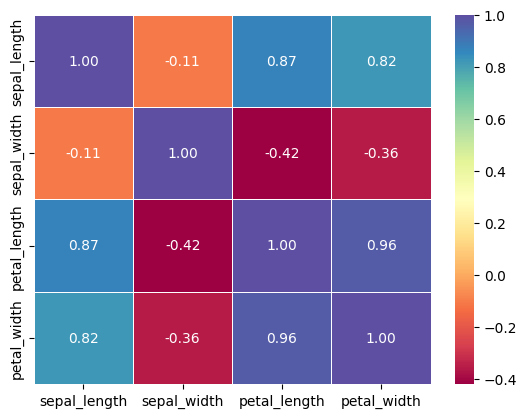

In [19]:
# Checking relationship between variables
fig,ax=plt.subplots()
sns.heatmap(iris.drop(columns='species').corr(), annot=True,cmap='Spectral',fmt=".2f",ax=ax,linewidth=0.5)
plt.show()

##### * This shows relationship of petal_length and petal_width has highly positive correlated(=0.96). sepal_length has highly positive correlation with both petal_width and petal_length which are 0.82 and 0.87 as respectively. sepal_width has moderately negative correlation with both petal_width and petal_length.

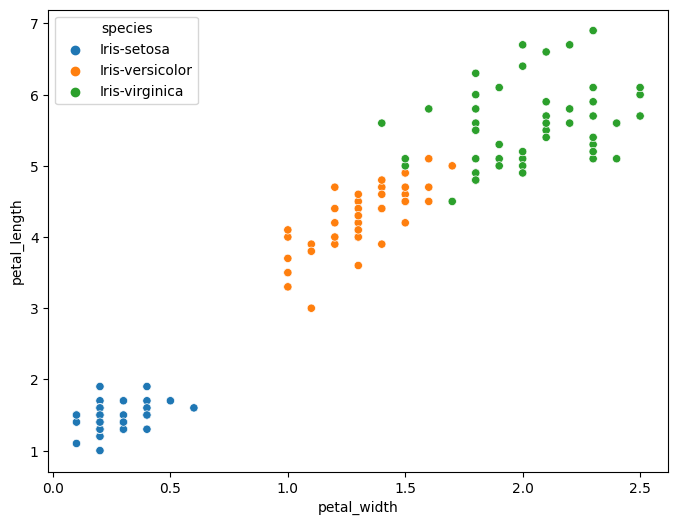

In [20]:
# Scatterplot for petal length and petal width by species
fig,ax=plt.subplots(figsize=(8,6))
sns.scatterplot(x="petal_width",y="petal_length",hue="species",data=iris)
plt.show()

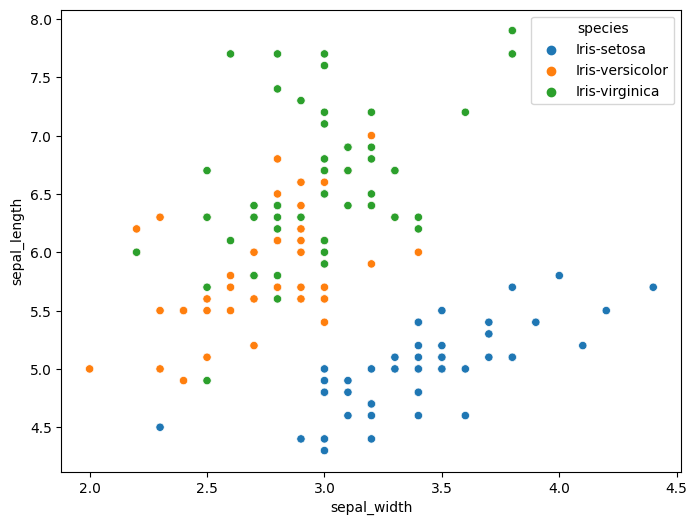

In [21]:
# Scatterplot for sepal length and sepal width by species
fig,ax=plt.subplots(figsize=(8,6))
sns.scatterplot(x="sepal_width",y="sepal_length",hue="species",data=iris)
plt.show()

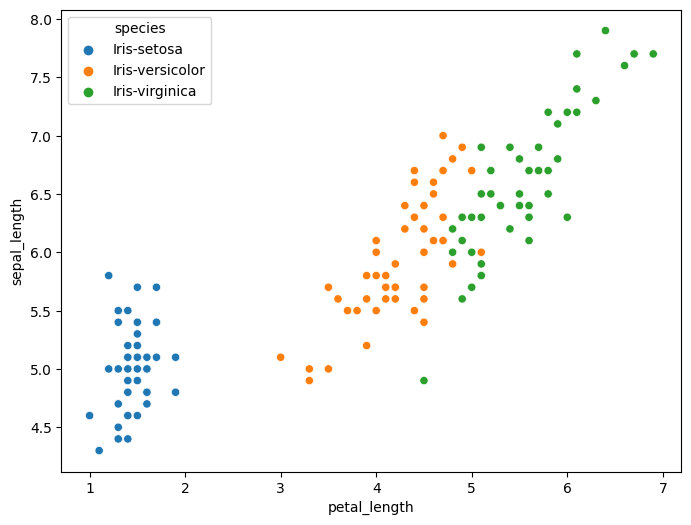

In [22]:
# Scatterplot for sepal length and petal length by species
fig,ax=plt.subplots(figsize=(8,6))
sns.scatterplot(x="petal_length",y="sepal_length",hue="species",data=iris)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

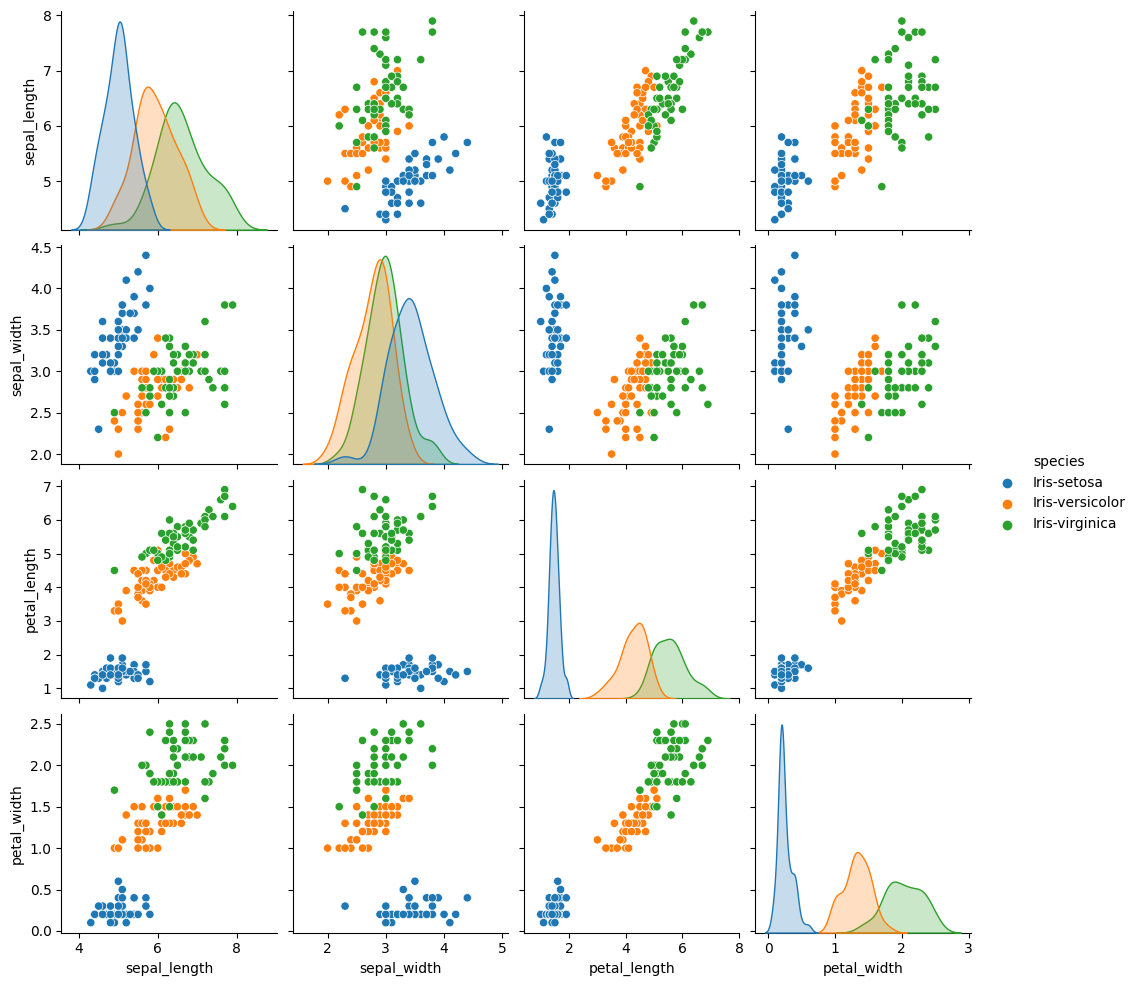

In [23]:
#Pairplot for data
sns.pairplot(iris, hue='species')

## Label Encoder

In [24]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [25]:
iris['species']=label_encoder.fit_transform(iris['species'])

In [26]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Data splitting

In [27]:
from sklearn.model_selection import train_test_split

# Define feature and target variables
x= iris.drop('species',axis=1)
y=iris['species']

#Split dataset into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)

train_data= x_train.join(y_train)
train_data

,sepal_length,sepal_width,petal_length,petal_width,species
35,5.0,3.2,1.2,0.2,0
68,6.2,2.2,4.5,1.5,1
147,6.5,3.0,5.2,2.0,2
135,7.7,3.0,6.1,2.3,2
118,7.7,2.6,6.9,2.3,2
...,...,...,...,...,...
39,5.1,3.4,1.5,0.2,0
108,6.7,2.5,5.8,1.8,2
15,5.7,4.4,1.5,0.4,0
43,5.0,3.5,1.6,0.6,0


## Model Selection

### Model Building and Model Evaluation

#### 1. <b><u>Logistic Regression Model</u></b> 

In [28]:
from sklearn.linear_model import LogisticRegression

#Build a Logisitc Regression model
fitted_model_lr = LogisticRegression()
#Train the model
fitted_model_lr.fit(x_train,y_train)
#Make predictions
y_pred_lr = fitted_model_lr.predict(x_test)

 Accuracy for LR: 0.9333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.88      1.00      0.93        14
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.96      0.93      0.94        30
weighted avg       0.94      0.93      0.93        30



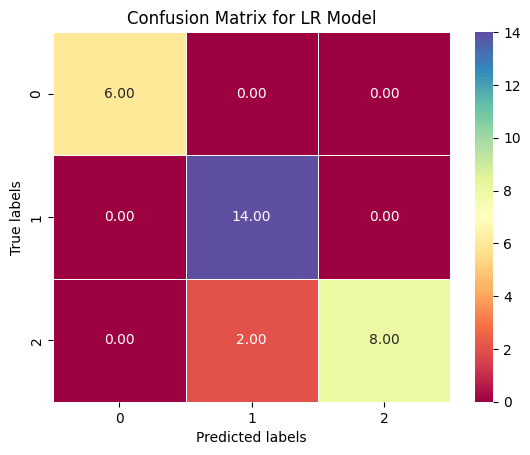

In [29]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Model's performance evaluating
accuracy = accuracy_score(y_test, y_pred_lr)
print(f' Accuracy for LR: {accuracy:.4f}')
print(classification_report(y_test, y_pred_lr))
cf=confusion_matrix(y_test,y_pred_lr)
sns.heatmap(cf,annot=True,fmt=".2f",cmap="Spectral",linewidth=0.5)
plt.title('Confusion Matrix for LR Model')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


###  <i>Interpretation for Performance Evaluation</i>


  ##### The model correctly classified 96.67% of the test data, which is a good performance. The Precision, Recall and F1-score show that the model is performing well for all three classes (0=Iris-setosa,1=Iris-versicolor,2=Iris-virginica). Also, as shown by the macro and weighted averages,the overall performance is excellent, with balanced performance across the classes. 

  ##### The confusion matrix shows how well the model has predicted each class. According to confusion matrix, the model performs perfectly for class 0 and class 1. For class 2, there is 1 misclassification (an instance of class 2 was predicted as class 1).We can said that the model performs very well with only one mistake across all 30 instances. Overall, the model made 29 correct predictions and 1 incorrect prediction, which explains the high accuracy of 96.67%.

 

#### 2. <u><b>K- Nearest Neighbors (KNN) Model</u></b> 

In [30]:
from sklearn.neighbors import KNeighborsClassifier

#Build a KNN model
fitted_model_knn = KNeighborsClassifier()
#Train the model
fitted_model_knn.fit(x_train,y_train)
#Make predictions
y_pred_knn = fitted_model_knn.predict(x_test)

 Accuracy for KNN: 0.9667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      0.93      0.96        14
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.98      0.97        30
weighted avg       0.97      0.97      0.97        30



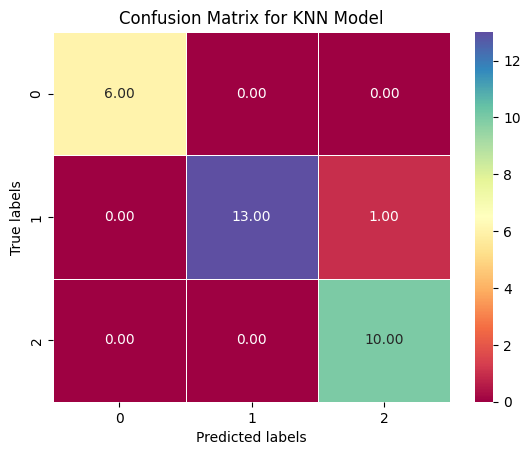

In [31]:
# Model's performance evaluating
accuracy1 = accuracy_score(y_test, y_pred_knn)
print(f' Accuracy for KNN: {accuracy1:.4f}')
print(classification_report(y_test, y_pred_knn))
cf1=confusion_matrix(y_test,y_pred_knn)
sns.heatmap(cf1,annot=True,fmt=".2f",cmap="Spectral",linewidth=0.5)
plt.title('Confusion Matrix for KNN Model')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

#### 3. <u><b>Support Vector Machine (SVM) Model</u></b> 

In [32]:
from sklearn.svm import SVC

#Build a KNN model
fitted_model_svm = SVC()
#Train the model
fitted_model_svm.fit(x_train,y_train)
#Make predictions
y_pred_svm = fitted_model_svm.predict(x_test)

 Accuracy for SVM: 0.9333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.88      1.00      0.93        14
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.96      0.93      0.94        30
weighted avg       0.94      0.93      0.93        30



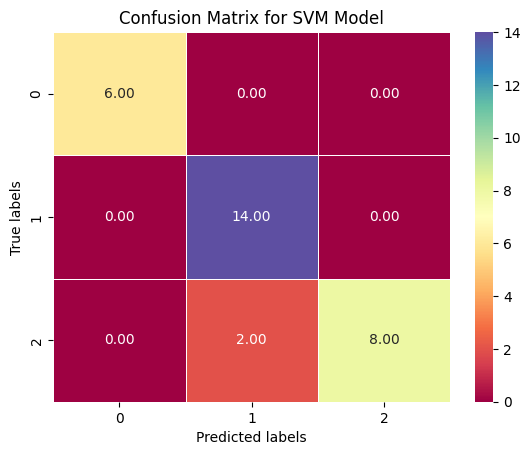

In [33]:
# Model's performance evaluating
accuracy2 = accuracy_score(y_test, y_pred_svm)
print(f' Accuracy for SVM: {accuracy2:.4f}')
print(classification_report(y_test, y_pred_svm))
cf2=confusion_matrix(y_test,y_pred_svm)
sns.heatmap(cf2,annot=True,fmt=".2f",cmap="Spectral",linewidth=0.5)
plt.title('Confusion Matrix for SVM Model')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

#### 4. <u><b>Decision Tree Model</u></b> 

In [34]:
from sklearn.tree import DecisionTreeClassifier

#Build a KNN model
fitted_model_dt = DecisionTreeClassifier()
#Train the model
fitted_model_dt.fit(x_train,y_train)
#Make predictions
y_pred_dt = fitted_model_dt.predict(x_test)

 Accuracy for DT: 0.9000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.82      1.00      0.90        14
           2       1.00      0.70      0.82        10

    accuracy                           0.90        30
   macro avg       0.94      0.90      0.91        30
weighted avg       0.92      0.90      0.90        30



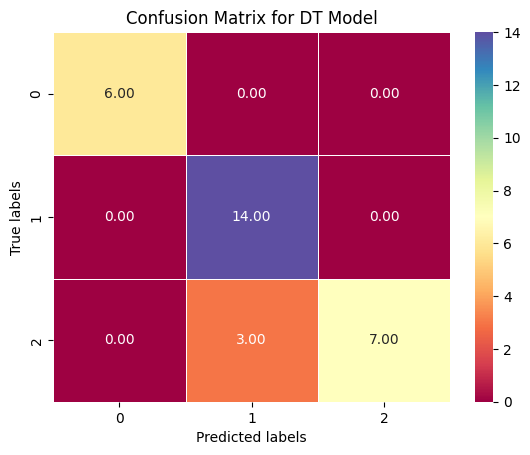

In [35]:
# Model's performance evaluating
accuracy3 = accuracy_score(y_test, y_pred_dt)
print(f' Accuracy for DT: {accuracy3:.4f}')
print(classification_report(y_test, y_pred_dt))
cf3=confusion_matrix(y_test,y_pred_dt)
sns.heatmap(cf3,annot=True,fmt=".2f",cmap="Spectral",linewidth=0.5)
plt.title('Confusion Matrix for DT Model')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

#### 5. <u><b>Random Forest Classifier Model</u></b> 

In [36]:
from sklearn.ensemble import RandomForestClassifier

#Build a KNN model
fitted_model_rf = RandomForestClassifier()
#Train the model
fitted_model_rf.fit(x_train,y_train)
#Make predictions
y_pred_rf = fitted_model_rf.predict(x_test)

 Accuracy for RF: 0.9333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.88      1.00      0.93        14
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.96      0.93      0.94        30
weighted avg       0.94      0.93      0.93        30



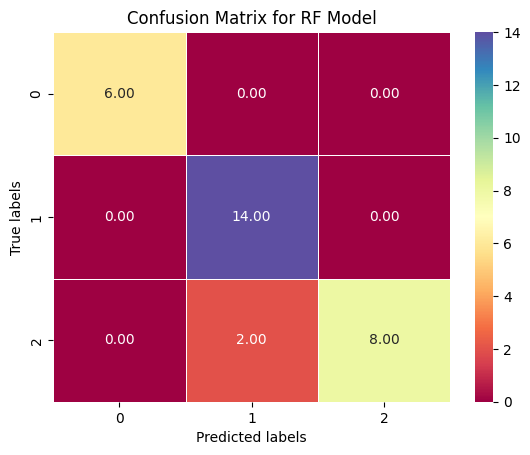

In [37]:
# Model's performance evaluating
accuracy4 = accuracy_score(y_test, y_pred_rf)
print(f' Accuracy for RF: {accuracy4:.4f}')
print(classification_report(y_test, y_pred_rf))
cf4=confusion_matrix(y_test,y_pred_rf)
sns.heatmap(cf4,annot=True,fmt=".2f",cmap="Spectral",linewidth=0.5)
plt.title('Confusion Matrix for RF Model')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

### Model Comparison

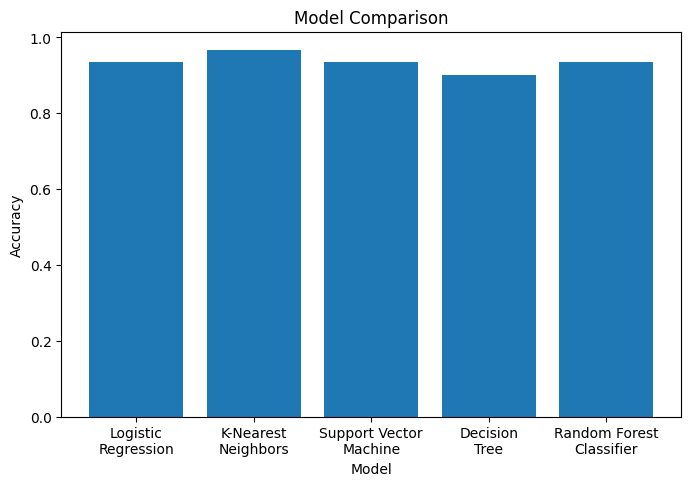

In [38]:
model_names = list(["Logistic\nRegression", "K-Nearest\nNeighbors", "Support Vector\nMachine", "Decision\nTree", "Random Forest\nClassifier"])
model_scores = list([accuracy,accuracy1,accuracy2,accuracy3,accuracy4])

fig,ax=plt.subplots(figsize=(8, 5))
ax.bar(model_names,model_scores)
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Model Comparison')
plt.show()